# Practice 4. Grayscale Mathematical Morphology

**Perez Bautista David 2016351090 3CV7**

## INTRODUCTION


## BINARY MORPHOLOGY
Morphology is a broad set of image processing operations that process images based on shapes. Morphological operations apply a structuring element to an input image, creating an output image of the same size. In a morphological operation, the value of each pixel in the output image is based on a comparison of the corresponding pixel in the input image with its neighbors.
In this case the values of pixels only are 0 ot 1, and and we operate these values like sets 

  #### UNION IMAGES
  This operation fuse the images.
 
  f(x,y)=x or y 
  where x,y are image's pixels of images A and
  
  #### INTERSECTION IMAGES
  This operation get image that have the pixels  on common between two images.
  
  f(x,y)=x and y 
  where x,y are image's pixels of images A and
 
  #### COMPLEMENT IMAGES
  This operation inverse the value of the pixels, 0 to 255 or 255 to 0.
  
  f(x)=not(x)


  #### ERODE 
  Erosion is one of the two basic operators in the area of mathematical   morphology.The basic effect of the operator on a binary image is to     erode away the boundaries of regions of foreground pixels (i.e. black   pixels, typically).

  For calculate erode we need do a match of pixels between the             structuring element and image, if there is a perfect match  then the 
  value of the output pixel is zero, else the value of output pixel is     one
  
  #### DILATE
  Dilation (usually represented by ⊕) is one of the basic operations in   mathematical morphology. Originally developed for binary images, it     has been expanded first to grayscale images, and then to complete       lattices. The dilation operation usually uses a structuring element     for probing and expanding the shapes contained in the input image.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from timeit import timeit
%matplotlib inline
from PIL import Image
%reload_ext Cython

In [2]:
filepath="./" #The current directory
#binfilename="a.jpg" 
#bin2filename="a1.jpeg" 

binfilename="a.jpg" 
bin2filename="b.JPEG"

pic1=Image.open(filepath+binfilename)
pic2=Image.open(filepath+bin2filename)

arr1 = np.asarray(pic1) #converts the image to an Numpy Array
arr2 = np.asarray(pic2) #converts the image to an Numpy Array


In [44]:
%%cython 
import numpy as np
cimport cython
@cython.boundscheck(False)
@cython.wraparound(False)

def union(const unsigned char [:,:,:] img1,const unsigned char [:,:,:]  img2):
    cdef union_=np.zeros((img1.shape[0],img1.shape[1],img1.shape[2]),dtype=np.uint8)
    cdef int i,j
    for ch in range(0,img1.shape[2]):
        for i in range(0,img1.shape[0]):
            for j in range(0,img1.shape[1]):
                union_[i,j,ch]=max(img1[i,j,ch],img2[i,j,ch])
    return union_

def intersection(const unsigned char [:,:,:] img1,const unsigned char [:,:,:] img2):
    cdef union_=np.zeros((img1.shape[0],img1.shape[1],img1.shape[2]),dtype=np.uint8)
    cdef int i,j
    for ch in range(0,img1.shape[2]):
        for i in range(0,img1.shape[0]):
            for j in range(0,img1.shape[1]):
                union_[i,j,ch]=min(img1[i,j,ch],img2[i,j,ch])
    return union_

def complement(const unsigned char [:,:,:] img):
    cdef aux=np.full((img.shape[0],img.shape[1],img.shape[2]),255,dtype=np.uint8)
    return aux-img


def Erosion(const unsigned char [:,:,:] imagen,const unsigned char [:,:] struct):  
    cdef erosion=np.zeros((imagen.shape[0]+2,imagen.shape[1]+2),dtype=np.uint8)
    cdef erosionfinal=np.zeros((imagen.shape[0],imagen.shape[1],imagen.shape[2]),dtype=np.uint8) 
    cdef int i,j
    cdef int actual,sig
    
    #framework zeros
    erosion[1:erosion.shape[0]-1,1:erosion.shape[1]-1]=np.asarray(imagen[:,:,0])
    
    for i in range(0,imagen.shape[0]):
        for j in range(0,imagen.shape[1]):
            actual=0
            maxim=0
            for x in range(0,struct.shape[0]):
                for y in range(0,struct.shape[1]):
                    actual=erosion[i+x,j+y]+struct[x,y]
                    maxim=max(maxim,actual)
            if maxim>255:
                maxim=255    
            erosionfinal[i,j,0]=maxim
    erosionfinal[:,:,1]=erosionfinal[:,:,0]
    erosionfinal[:,:,2]=erosionfinal[:,:,0]
    return erosionfinal

def Dilatacion(const unsigned char [:,:,:] imagen,const unsigned char [:,:] struct):  
    cdef erosion=np.full((imagen.shape[0]+2,imagen.shape[1]+2,imagen.shape[2]),255,dtype=np.uint8)
    cdef erosionfinal=np.array(imagen)  
    cdef int i,j
    cdef int actual,sig
    
    #framework zeros
    erosion[1:erosion.shape[0]-1,1:erosion.shape[1]-1,0]=np.asarray(imagen[:,:,0])
    
    for i in range(0,imagen.shape[0]):
        for j in range(0,imagen.shape[1]):  
            actual=255
            minim=255
            for x in range(0,struct.shape[0]):
                for y in range(0,struct.shape[1]):
                        actual=erosion[i+x,j+y,0]-struct[x,y]
                        minim=min(minim,actual)
                if(minim<0):
                    minim=0
            erosionfinal[i,j,0]=minim
                
    erosionfinal[:,:,1]=erosionfinal[:,:,0]
    erosionfinal[:,:,2]=erosionfinal[:,:,0]
    return erosionfinal


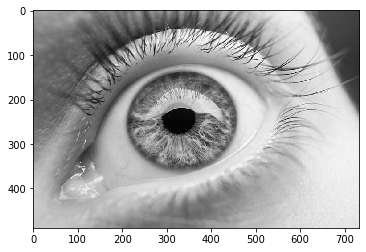

In [45]:
plt.imshow(arr1)

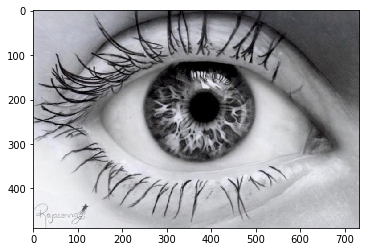

In [5]:
plt.imshow(arr2)

## Union 

CPU times: user 404 ms, sys: 8.08 ms, total: 412 ms
Wall time: 413 ms


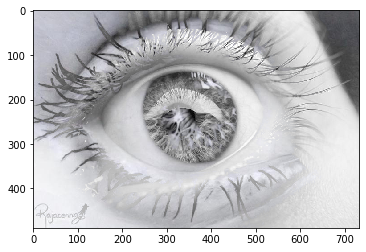

In [46]:
%%time
union_=union(arr1,arr2)
plt.imshow(union_)

## Intersection

CPU times: user 431 ms, sys: 3.96 ms, total: 435 ms
Wall time: 436 ms


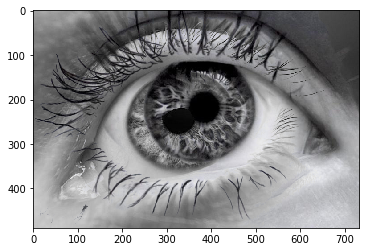

In [47]:
%%time
inter=intersection(arr1,arr2)
plt.imshow(inter)

## Complement

CPU times: user 63.6 ms, sys: 4.01 ms, total: 67.6 ms
Wall time: 67.3 ms


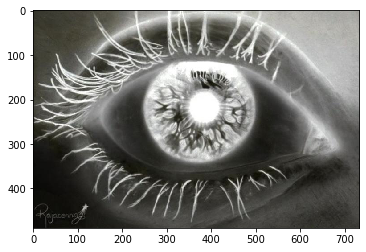

In [48]:
%%time
complement_=complement(arr2)
plt.imshow(complement_)

## Erode

In [41]:
struct=np.array([[10,   10, 10],
                 [10,   10, 10],
                 [10,   10, 10]
                   ],dtype=np.uint8)

struct2=np.array([[  30, 30, 30]
                   ],dtype=np.uint8)

CPU times: user 6.76 s, sys: 36 ms, total: 6.8 s
Wall time: 6.76 s


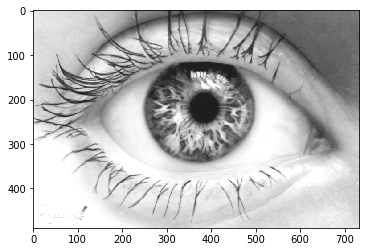

In [42]:
%%time
ero=Erosion(arr2,struct2)
plt.imshow(ero)

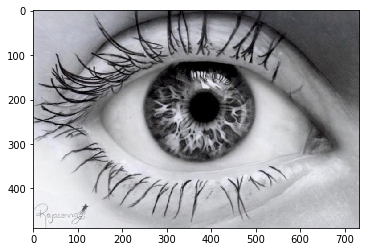

In [14]:
plt.imshow(arr2)

## DILATE

CPU times: user 6.53 s, sys: 48 ms, total: 6.58 s
Wall time: 6.55 s


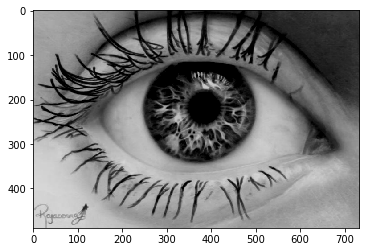

In [43]:
%%time
dil=Dilatacion(arr2,struct2)
plt.imshow(dil)

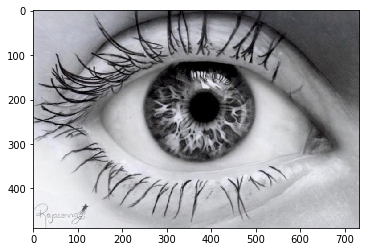

In [17]:
plt.imshow(arr2)

## CONCLUTIONS
Finally we have different operations for manipulate images and see characteristics of these,  the most difficult operation to programmer is the convolution, this operation is more complex than other operations in a binary images or grayscale images. In the others operations just get the pixels that to manipulated and we should to applicate some logic or arithmetic  operators in the pixel's  values.  
We can to get the internal or external borders of the figures in the image, but the time of the algorithm can be long if you programme worst the algorithm.